# Homework 1 

In [86]:
import numpy as np 
import pandas as pd 
from scipy.stats import friedmanchisquare
import matplotlib.pylab as plt

plt.style.use('bmh')

## Problem 1 

See solutions on D2L. 

## Problem 2

In [54]:
def mvnrnd(mu, Sigma, N=1000): 
    return np.random.multivariate_normal(mu, Sigma, N)

def mahal(x, mu, Sigma): 
    return np.dot(np.dot(x-mu,np.linalg.inv(Sigma)), x-mu)

def disc(x, mu, Sigma, p):
    d = len(mu)
    return -mahal(x, mu, Sigma)/2 - (d/2)*np.log(2*np.pi) - np.log(np.linalg.det(Sigma)) + np.log(p)

Text(0, 0.5, '$x_2$')

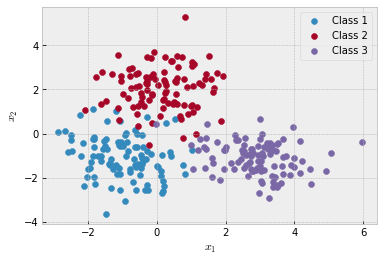

In [16]:
# test mvnrnd 
C, N = [[.8,0],[0,.8]], 100
X1, X2, X3 = mvnrnd([-1,-1], C, N), mvnrnd([0,2], C, N), mvnrnd([3,-1], C, N)

plt.figure()
plt.scatter(X1[:,0], X1[:,1], label='Class 1')
plt.scatter(X2[:,0], X2[:,1], label='Class 2')
plt.scatter(X3[:,0], X3[:,1], label='Class 3')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

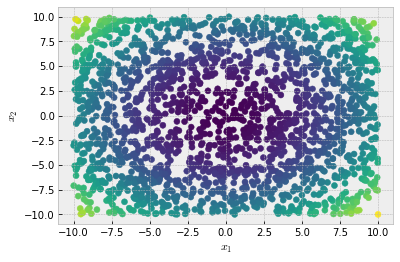

In [52]:
# test out the mahalanobis distance 
C, N = [[.8,0],[0,.8]], 100
M = 2000
X = mvnrnd([0,0], C, N)
point = np.array([.25, .25])

# get mean and covariance 
mu = np.mean(X, axis = 0)
Sigma = np.cov(X.T)


Xt = 20*np.random.rand(M, 2) - 10

md = np.zeros((M, ))
for i, x in zip(range(M), Xt): 
    md[i] = mahal(x, mu, Sigma)

plt.figure()
plt.scatter(Xt[:,0], Xt[:,1], c=md)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


Text(0, 0.5, '$x_2$')

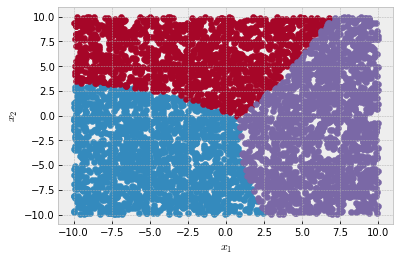

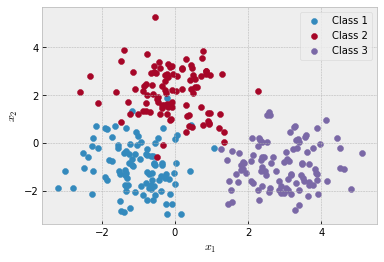

In [65]:
# test disc 
C, N, M = [[.8,0],[0,.8]], 100, 5000
X1, X2, X3 = mvnrnd([-1,-1], C, N), mvnrnd([0,2], C, N), mvnrnd([3,-1], C, N)

# get mean and covariance 
mu1, mu2, mu3 = np.mean(X1, axis = 0), np.mean(X2, axis = 0), np.mean(X3, axis = 0)
Sigma1, Sigma2, Sigma3 = np.cov(X1.T), np.cov(X2.T), np.cov(X3.T)
priors = np.array([1.,1.,1.])
priors /= priors.sum()

outcome = np.zeros((M, ))
Xt = 20*np.random.rand(M, 2) - 10

for m in range(M): 
    g1 = disc(Xt[m], mu1, Sigma1, priors[0])
    g2 = disc(Xt[m], mu2, Sigma2, priors[1])
    g3 = disc(Xt[m], mu3, Sigma3, priors[2])
    outcome[m] = np.argmax([g1, g2, g3])

plt.figure()
plt.scatter(Xt[outcome==0,0], Xt[outcome==0,1])
plt.scatter(Xt[outcome==1,0], Xt[outcome==1,1])
plt.scatter(Xt[outcome==2,0], Xt[outcome==2,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


plt.figure()
plt.scatter(X1[:,0], X1[:,1], label='Class 1')
plt.scatter(X2[:,0], X2[:,1], label='Class 2')
plt.scatter(X3[:,0], X3[:,1], label='Class 3')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Problem 3

In [83]:
def sample(N, p):
    random_sample = np.zeros(N)
    p_estimate = np.zeros(len(p))
    p_cdf = np.cumsum(p)
    counts = np.zeros(len(p))

    for n in range(N):
        # generate a random number on [0,1]
        x = np.random.rand()
        random_sample[n] = np.where(((p_cdf > x)*1.0) == 1.)[0][0]
        counts[int(random_sample[n])] += 1

    p_estimate = counts/counts.sum()
    return random_sample, p_estimate

def kl(p1, p2): 
    return (new_p*np.log(new_p/p)).sum()

def divergence(p1, p2): 
    return (kl(p1, p2) + kl(p2, p1))/2.0


In [84]:
# number of items in the sample space
N = 5
# generate a random distribution for the samples
p = np.random.rand(N)*np.random.rand(N)
p = p/p.sum()
new_n, new_p = sample(5000, p)
print('Theoretical p')
print(p)
print('Estimate of p')
print(new_p)
print('Symmetric KL Divergence')
print(divergence(p, new_p))

Theoretical p
[0.26930718 0.08808891 0.18086629 0.44702772 0.0147099 ]
Estimate of p
[0.2686 0.0906 0.1838 0.443  0.014 ]
Symmetric KL Divergence
9.566230214903642e-05


In [97]:
# is there a difference between the difference classifiers 
alpha = 0.05
X = pd.read_csv('hw1-scores.txt', header=None).values
s, p = friedmanchisquare(X[:,0], X[:,1], X[:,2], X[:,3], X[:,4], X[:,5])
if p <= alpha:
    print('Reject the null hypothesis')
else: 
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


(27, 6)